In [1]:
# Python - Document Classification
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pickle
from sklearn.externals import joblib


# Loading the dataset

In [3]:
df = pd.read_csv("shuffled-full-set-hashed.csv",names=["document_title","data"])
# reading first five rows in the dataset
print df.head()
# size of data - 62204 rows and 2 columns
print(df.shape)
# unique gives 14 unique document titles
print df.describe()

         document_title                                               data
0  DELETION OF INTEREST  e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1        RETURNED CHECK  a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2                  BILL  586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3                  BILL  cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4                  BILL  9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...
(62204, 2)
       document_title                                               data
count           62204                                              62159
unique             14                                              60176
top              BILL  bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...
freq            18968                                                 11


In [4]:
# removing missing values
print(sum(df["data"].isnull()))
df1 = df.dropna()
sum(df1.data.isnull())

45


0

In [5]:
# removing duplicates
print(sum(df1.duplicated()))
df2 = df1.drop_duplicates()
print sum(df2.duplicated())

1617
0


In [6]:
X = df2.data
y = df2.document_title
X.shape

(60542,)

                          0      1
0             POLICY CHANGE  10229
1       CANCELLATION NOTICE   9571
2               BILL BINDER    277
3        CHANGE ENDORSEMENT    866
4   INTENT TO CANCEL NOTICE    227
5                      BILL  18449
6               APPLICATION    226
7                    BINDER   8590
8      REINSTATEMENT NOTICE   4295
9         EXPIRATION NOTICE    719
10              DECLARATION    966
11       NON-RENEWAL NOTICE    618
12           RETURNED CHECK    730
13     DELETION OF INTEREST   4779


Text(0.5,1,u'given data plot')

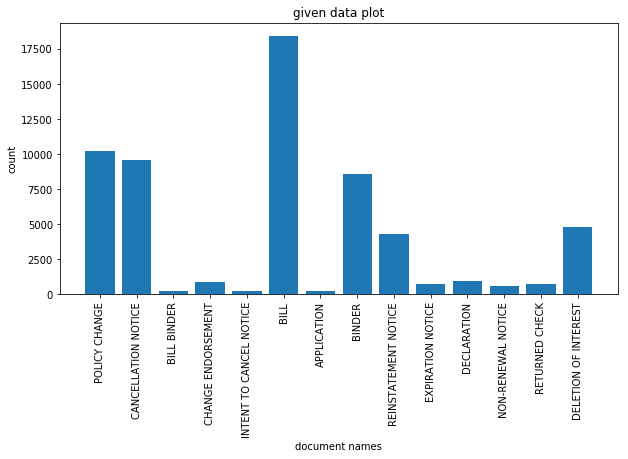

In [7]:
title_count={x:0 for x in set(df2['document_title'])}
# to verify
#print title_count 

for i in df2['document_title']:
    title_count[i] += 1
print(pd.DataFrame.from_dict(title_count.items()))
plt.figure(figsize=(10,5))
plt.bar(range(len(title_count)),title_count.values())
plt.xticks(range(len(title_count)),title_count.keys(),rotation = 90)
plt.xlabel("document names")
plt.ylabel("count")
plt.title("given data plot")

# Dividing the given data into train and test splits

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
# 80% - train , 20% - test

In [9]:
# finding features
vectorizer = TfidfVectorizer(min_df =0.1, lowercase = False, smooth_idf=False)
x_train = vectorizer.fit_transform(X_train)
x_train.shape

(48433, 310)

In [11]:
print "number of training examples", x_train.shape[0]
print "number of features", x_train.shape[1]
X_test.dtype

number of training examples 48433
number of features 310


dtype('O')

In [12]:
x_test = vectorizer.transform(X_test)
print x_test.shape

(12109, 310)


In [13]:
with open("vectorizer.pkl","wb") as file:
    joblib.dump(vectorizer,file)

In [14]:
k = y_train.unique()

Text(0.5,1,u'test data distribution')

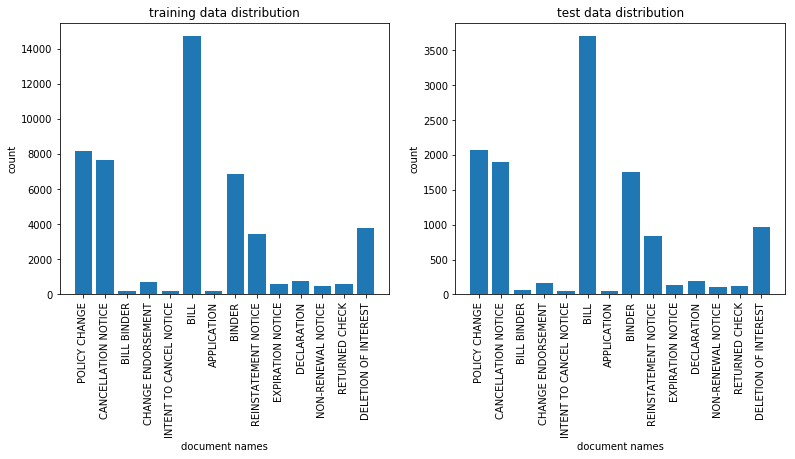

In [15]:
# training data division
#x_ train
#y_train

t={x:0 for x in set(k)}
# to verify
#print title_count 
#print t

for i in y_train:
    t[i] += 1

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.bar(range(len(t)),t.values())
plt.xticks(range(len(t)),t.keys(),rotation = 90)
plt.xlabel("document names")
plt.ylabel("count")
plt.title("training data distribution")
# test data distribution
t={x:0 for x in set(k)}
# to verify
#print title_count 
#print t

for i in y_test:
    t[i] += 1
plt.subplot(1,2,2)
plt.bar(range(len(t)),t.values())
plt.xticks(range(len(t)),t.keys(),rotation = 90)
plt.xlabel("document names")
plt.ylabel("count")
plt.title("test data distribution")

# Testing different classification algorithms

In [14]:
# multinomial naive bayes - each feature independent 
#from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB().fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#print metrics.accuracy_score(y_test,y_pred)
#metrics.confusion_matrix(y_test, y_pred_class)
#from sklearn.metrics import classification_report  
#print(classification_report(y_test, y_pred))

0.7064167148402015
                         precision    recall  f1-score   support

            APPLICATION       0.00      0.00      0.00        44
                   BILL       0.75      0.91      0.82      3710
            BILL BINDER       0.00      0.00      0.00        57
                 BINDER       0.63      0.85      0.73      1760
    CANCELLATION NOTICE       0.58      0.72      0.64      1904
     CHANGE ENDORSEMENT       0.58      0.73      0.64       157
            DECLARATION       0.00      0.00      0.00       187
   DELETION OF INTEREST       0.95      0.63      0.76       973
      EXPIRATION NOTICE       1.00      0.13      0.23       136
INTENT TO CANCEL NOTICE       0.00      0.00      0.00        42
     NON-RENEWAL NOTICE       0.00      0.00      0.00       111
          POLICY CHANGE       0.74      0.55      0.63      2070
   REINSTATEMENT NOTICE       0.87      0.41      0.56       836
         RETURNED CHECK       0.92      0.58      0.71       122

    

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier().fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#print metrics.accuracy_score(y_test,y_pred)
#metrics.confusion_matrix(y_test, y_pred_class)
#from sklearn.metrics import classification_report  
#print(classification_report(y_test, y_pred))

0.8388801717730614
                         precision    recall  f1-score   support

            APPLICATION       0.54      0.64      0.58        44
                   BILL       0.87      0.90      0.88      3710
            BILL BINDER       0.38      0.11      0.16        57
                 BINDER       0.79      0.86      0.83      1760
    CANCELLATION NOTICE       0.81      0.83      0.82      1904
     CHANGE ENDORSEMENT       0.84      0.85      0.84       157
            DECLARATION       0.42      0.16      0.23       187
   DELETION OF INTEREST       0.88      0.88      0.88       973
      EXPIRATION NOTICE       0.79      0.68      0.73       136
INTENT TO CANCEL NOTICE       0.51      0.43      0.47        42
     NON-RENEWAL NOTICE       0.88      0.67      0.76       111
          POLICY CHANGE       0.83      0.80      0.81      2070
   REINSTATEMENT NOTICE       0.93      0.87      0.90       836
         RETURNED CHECK       0.88      0.82      0.85       122

    

In [20]:
#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier().fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#print metrics.accuracy_score(y_test,y_pred)
#metrics.confusion_matrix(y_test, y_pred_class)
#from sklearn.metrics import classification_report  
#print(classification_report(y_test, y_pred))

0.7861920885291932
                         precision    recall  f1-score   support

            APPLICATION       0.27      0.27      0.27        44
                   BILL       0.85      0.85      0.85      3710
            BILL BINDER       0.16      0.18      0.17        57
                 BINDER       0.76      0.75      0.75      1760
    CANCELLATION NOTICE       0.79      0.80      0.80      1904
     CHANGE ENDORSEMENT       0.69      0.76      0.72       157
            DECLARATION       0.18      0.20      0.19       187
   DELETION OF INTEREST       0.88      0.86      0.87       973
      EXPIRATION NOTICE       0.65      0.63      0.64       136
INTENT TO CANCEL NOTICE       0.52      0.36      0.42        42
     NON-RENEWAL NOTICE       0.78      0.76      0.77       111
          POLICY CHANGE       0.74      0.74      0.74      2070
   REINSTATEMENT NOTICE       0.83      0.85      0.84       836
         RETURNED CHECK       0.72      0.70      0.71       122

    

In [16]:
from sklearn.ensemble import RandomForestClassifier
#scores = []
#trees = [5,10,20,30,40,50,60,100,300]
#for n_trees in trees:
#    clf = RandomForestClassifier(n_estimators = n_trees, n_jobs = -1, random_state = 42)
#    k = clf.fit(x_train,y_train)
#    y_pred = k.predict(x_test)
#    sc = 100 * metrics.accuracy_score(y_test,y_pred)
#    scores.append(sc)
#print scores
#[82.12073664216697, 84.26789990915847, 85.4075481047155, 85.73788091502188, 85.87001403914444, 85.93608060120572, 85.8782723594021, 86.20860516970849, 86.42332149640764]

In [17]:
# random forest with number of trees = 50
clf = RandomForestClassifier(n_estimators = 50, n_jobs = -1, random_state = 42)
final_model = clf.fit(x_train,y_train)
y_pred = final_model.predict(x_test)
print metrics.accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

0.8593608060120571
                         precision    recall  f1-score   support

            APPLICATION       0.78      0.41      0.54        44
                   BILL       0.89      0.90      0.89      3710
            BILL BINDER       0.44      0.14      0.21        57
                 BINDER       0.80      0.89      0.84      1760
    CANCELLATION NOTICE       0.85      0.87      0.86      1904
     CHANGE ENDORSEMENT       0.86      0.78      0.82       157
            DECLARATION       0.37      0.12      0.18       187
   DELETION OF INTEREST       0.93      0.89      0.91       973
      EXPIRATION NOTICE       0.85      0.70      0.77       136
INTENT TO CANCEL NOTICE       0.71      0.40      0.52        42
     NON-RENEWAL NOTICE       0.97      0.77      0.86       111
          POLICY CHANGE       0.81      0.85      0.83      2070
   REINSTATEMENT NOTICE       0.93      0.92      0.93       836
         RETURNED CHECK       0.98      0.82      0.89       122

    

In [18]:
y_predas = final_model.predict_proba(x_test)
y_predask =  np.max(y_predas, axis = 1)
y_predask

array([0.88, 0.62, 1.  , ..., 0.72, 1.  , 0.42])

In [44]:
## to test
#df3 = pd.read_csv("HeavyWaterTestDataSet.csv",names=["document_title","data"])
#df4 = df3.replace(np.nan, '', regex=True)
#x_test = df4.data
#y_test = df4.document_title
#x_test = vectorizer.transform(x_test)
#print x_test.shape
#y_pred = final_model.predict(x_test)
#print metrics.accuracy_score(y_test,y_pred)
#print(classification_report(y_test, y_pred))

In [19]:
joblib.dump(final_model,"random_forest.pkl")

['random_forest.pkl']

In [20]:
#import pickle
#from sklearn.externals import joblib
#k11 = pickle.load(open("/Users/kakarlakeerthy/Desktop/MyModel/vectorizer.pk", "rb"))

#k12 = joblib.load(open("/Users/kakarlakeerthy/Desktop/MyModel/random_forest.pkl", "rb"))

In [25]:
#s = raw_input()
#ss = [s]
#d = { 'data':s}

cd50e861f48b 6ca2dd348663 d38820625542 f07761418345 5948001254b3 9997460cf372 3f7a70f3474f 6bc122aa4b06 b4f1b88bd3f3 25c57acdf805 54709b24b45f 51fc8b56e14f ff714b9fa7fd 798fe9915030 2d5d7bc2df91 6b583fe13e39 8e93a2273a93 3d877a3bc4f0 ff1c26ea0b6f d9ef68daef4c 9a42ead47d1c 5cde1ed4f9b0 a20e78c41cf9 dec88250479b ecee69844b4e 87b8193a0183 0c470ee92bb5 cd50f04925dd 878460b4304e b4f1b88bd3f3 133d46f7ed38 d38820625542 f682089485c3 96776b42c1d5 51fc8b56e14f 3f7a70f3474f d911e9441d32 c16651ffa1b7 9374c105ef84 f8b0c07e306c d38820625542 e0a08df8ec4c f8dab246f73f 878460b4304e 3f7a70f3474f b4f1b88bd3f3 6ce6cc5a3203 b4f1b88bd3f3 ddf4525e90e3 55b85f1ee56e c63534ebfa82 878460b4304e 9448e1c70dec 1932d6ce3497 8243aca146b2 2ea49cf89745 ff714b9fa7fd e4dad7cb07b6 ff714b9fa7fd 549330b9e320 f7bb594ff117 e63fa74d3c8b df03d288b8b6 cd50e861f48b f7bb594ff117 a1bb6b4223d9 ba02159e05b1 37ac79620fc6 1087de55f102 80948b43ec70 d9fc2cff7e21 abca9d18fae2 6cfef272bdb9 9d83e581af4b cc9e05bc2a86 cbd0a3abbc34 69954839bb65

In [30]:
#k = pd.DataFrame({'data':ss})

In [33]:
#asd = k.data

In [34]:
#vectorizer.transform(asd)

<1x310 sparse matrix of type '<type 'numpy.float64'>'
	with 91 stored elements in Compressed Sparse Row format>